<a href="https://colab.research.google.com/github/awidener21/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_DS_Unit_1_Sprint_Challenge_1_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data',header=None,names=['Age','Year','Nodes','Status'])
df['Status'].replace([1,2],[1, 0],inplace=True) 
df.head()

,Age,Year,Nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [73]:
df.sample(10)

,Age,Year,Nodes,Status
31,38,66,11,1
120,49,62,1,1
210,58,61,1,1
125,50,64,0,0
113,48,66,0,1
138,51,64,7,1
300,74,63,0,1
80,45,65,6,0
254,64,65,22,1
286,70,58,4,0


In [74]:
df.isnull().sum()

Age       0
Year      0
Nodes     0
Status    0
dtype: int64

## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

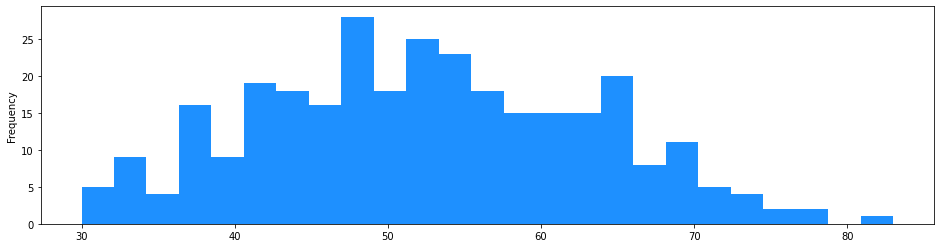

In [122]:
df['Status'],df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='dodgerblue');


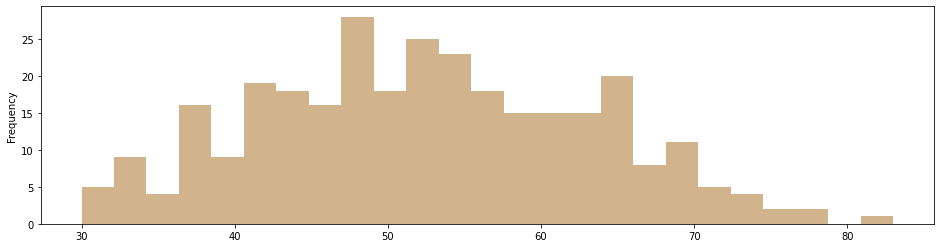

In [130]:
df['Nodes'],df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');

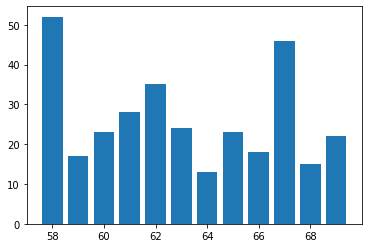

In [113]:
plt.bar(df['Year'],df['Nodes']);

In [65]:
pd.crosstab(df.Year,df.Status,normalize='index')

Status,0,1
Year,,
58,0.333333,0.666667
59,0.333333,0.666667
60,0.142857,0.857143
61,0.115385,0.884615
62,0.304348,0.695652
63,0.266667,0.733333
64,0.258065,0.741935
65,0.464286,0.535714
66,0.214286,0.785714


In [66]:
pd.crosstab(df.Age,df.Status,normalize='index')

Status,0,1
Age,,
30,0.000000,1.000000
31,0.000000,1.000000
33,0.000000,1.000000
34,0.285714,0.714286
35,0.000000,1.000000
36,0.000000,1.000000
37,0.000000,1.000000
38,0.100000,0.900000
39,0.166667,0.833333


In [99]:
pd.crosstab(df.Age,df.Status,margins=True)

Status,0,1,All
Age,,,
30,0,3,3
31,0,2,2
33,0,2,2
34,2,5,7
35,0,2,2
36,0,2,2
37,0,6,6
38,1,9,10
39,1,5,6


In [102]:
pd.crosstab(df.Status,df.Nodes,margins=True)

Nodes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52,All
Status,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,19,8,5,7,3,4,3,2,2,4,1,3,1,4,1,2,0,1,0,2,1,1,1,3,1,0,0,0,1,0,1,81
1,117,33,15,13,10,2,4,5,5,2,2,1,1,1,3,1,1,0,1,1,1,0,2,0,0,1,1,1,0,1,0,225
All,136,41,20,20,13,6,7,7,7,6,3,4,2,5,4,3,1,1,1,3,2,1,3,3,1,1,1,1,1,1,1,306


In [135]:
pd.crosstab(df.Year,df.Nodes,margins=True)

Nodes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,28,30,35,46,52,All
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
58,16,6,3,3,2,0,0,0,0,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,36
59,8,1,8,2,0,0,1,1,2,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,27
60,11,7,1,2,2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,28
61,11,4,2,0,1,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,26
62,9,3,1,3,0,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,23
63,14,4,1,1,2,0,2,0,0,0,0,0,0,1,1,0,0,0,0,2,0,0,0,1,1,0,0,0,0,0,0,30
64,17,4,1,1,1,0,1,2,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31
65,13,2,0,2,2,1,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,28
66,15,3,1,1,2,0,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,28


In [90]:
pd.crosstab(df.Year,df.Status,margins=True)

Status,0,1,All
Year,,,
58,12,24,36
59,9,18,27
60,4,24,28
61,3,23,26
62,7,16,23
63,8,22,30
64,8,23,31
65,13,15,28
66,6,22,28


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

It seems as the younger age had a better survival rate. Also if you had a low node count you had a better chance of survival.

- What is at least one feature that looks to have a negative relationship with survival?

As you got older your survival rate was decreased. The more nodes you have the less chance of survival.

- How are those two features related with each other, and what might that mean?

It is very apparent that the less nodes you have the better survival rate you have. I think it has a lot to do with health when dealing with the age. It even shows the earlier year you were born there were numerous people with 0 node counts. 

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.